<a href="https://colab.research.google.com/github/omerfarukyuce/Coffee-Sales-EDA-and-Prediction/blob/main/Coffee_Sales_EDA_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import And Install Necessary Libraries**

In [1]:
# !pip install lightgbm
# !pip install fbprophet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from prophet import Prophet
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **Load the Dataset**

In [3]:
df = pd.read_csv("index.csv")

In [4]:
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
2833,2025-01-22,2025-01-22 18:49:59.374,card,ANON-0000-0000-1119,35.76,Cocoa
2834,2025-01-22,2025-01-22 19:10:26.039,card,ANON-0000-0000-1051,30.86,Americano with Milk
2835,2025-01-22,2025-01-22 19:11:23.124,card,ANON-0000-0000-1051,35.76,Cappuccino
2836,2025-01-22,2025-01-22 19:29:15.703,card,ANON-0000-0000-1120,35.76,Latte


# **Understand And Organize the Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2838 non-null   object 
 1   datetime     2838 non-null   object 
 2   cash_type    2838 non-null   object 
 3   card         2749 non-null   object 
 4   money        2838 non-null   float64
 5   coffee_name  2838 non-null   object 
dtypes: float64(1), object(5)
memory usage: 133.2+ KB


In [6]:
df.shape

(2838, 6)

In [7]:
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [8]:
df.describe()

,money
count,2838.000000
mean,31.887456
std,4.974523
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [9]:
df['coffee_name'].unique()

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2838 non-null   object        
 1   datetime     2838 non-null   datetime64[ns]
 2   cash_type    2838 non-null   object        
 3   card         2749 non-null   object        
 4   money        2838 non-null   float64       
 5   coffee_name  2838 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 133.2+ KB


# **EDA (Exploratory Data Analysis)**

## **Coffee Sales Money per Hour of Day**

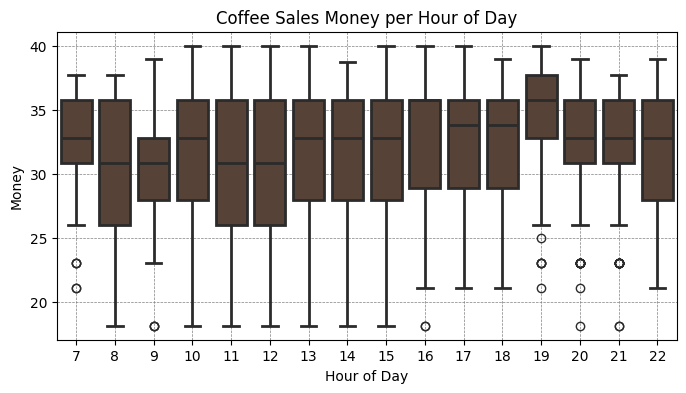

In [12]:
df['hour'] = df['datetime'].dt.hour

plt.figure(figsize=(8, 4))
sns.boxplot(x='hour', y='money', data=df, color="#5C4033", linewidth=2)
plt.title('Coffee Sales Money per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Money')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")

plt.show()

## **Hourly Coffee Sales**

In [13]:
hourly_coffee_sales = df.groupby(df['datetime'].dt.hour)['money'].sum()

In [14]:
hourly_coffee_sales

,money
datetime,
7,2272.36
8,5665.46
9,5684.96
10,8776.04
11,7214.04
12,6145.22
13,5600.06
14,5318.18
15,5180.10


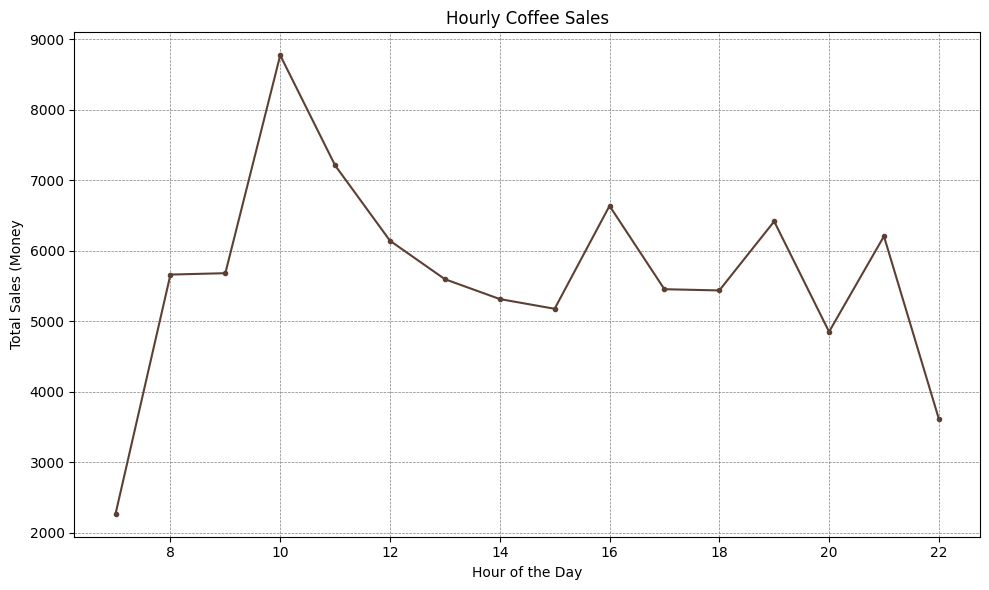

In [15]:
plt.figure(figsize=(10, 6))
hourly_coffee_sales.plot(kind='line', marker='.', linestyle='-', color="#5C4033")
plt.title('Hourly Coffee Sales')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales (Money')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.tight_layout()
plt.show()

## **Sales Revenue by Hour**

In [16]:
df["hourly_total_sales"] = df.groupby(["hour", "coffee_name"])["money"].transform("sum")

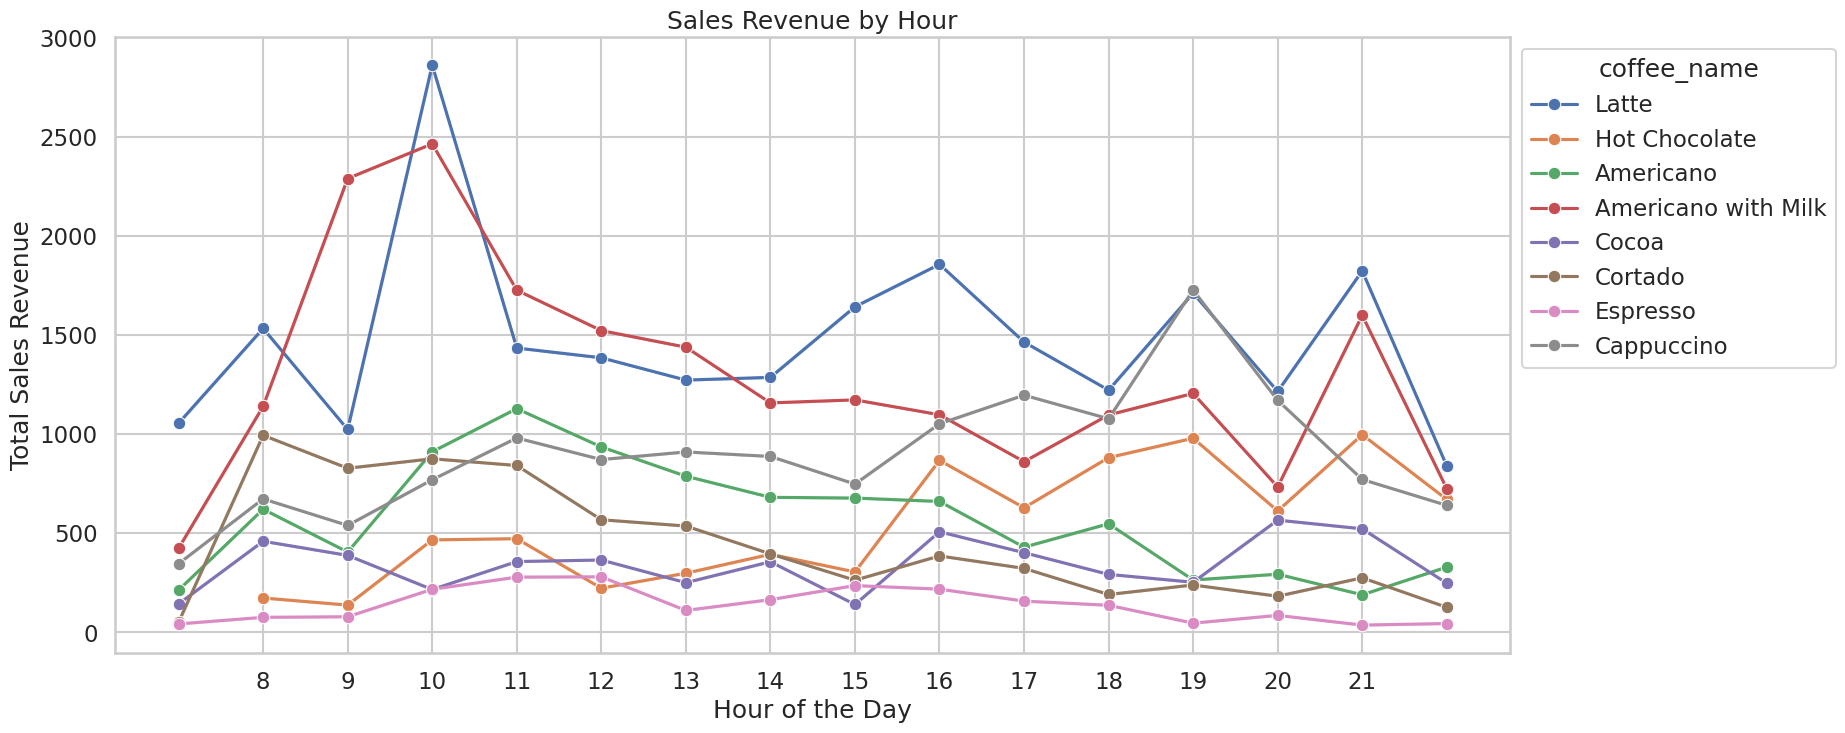

In [17]:
plt.figure(figsize=(18, 8))

sns.set(style="whitegrid")
sns.set_context("talk")

ax = sns.lineplot(data=df, x="hour", y="hourly_total_sales", hue="coffee_name", marker="o")

plt.title("Sales Revenue by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales Revenue")
plt.xticks(range(8, 22))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()


## **Daily Sales for the Year**

In [18]:
daily_sales = df.groupby(df['datetime'].dt.date )['money'].sum()

In [19]:
daily_sales

,money
datetime,
2024-03-01,396.30
2024-03-02,228.10
2024-03-03,349.10
2024-03-04,135.20
2024-03-05,338.50
...,...
2025-01-17,312.04
2025-01-18,138.14
2025-01-20,313.50


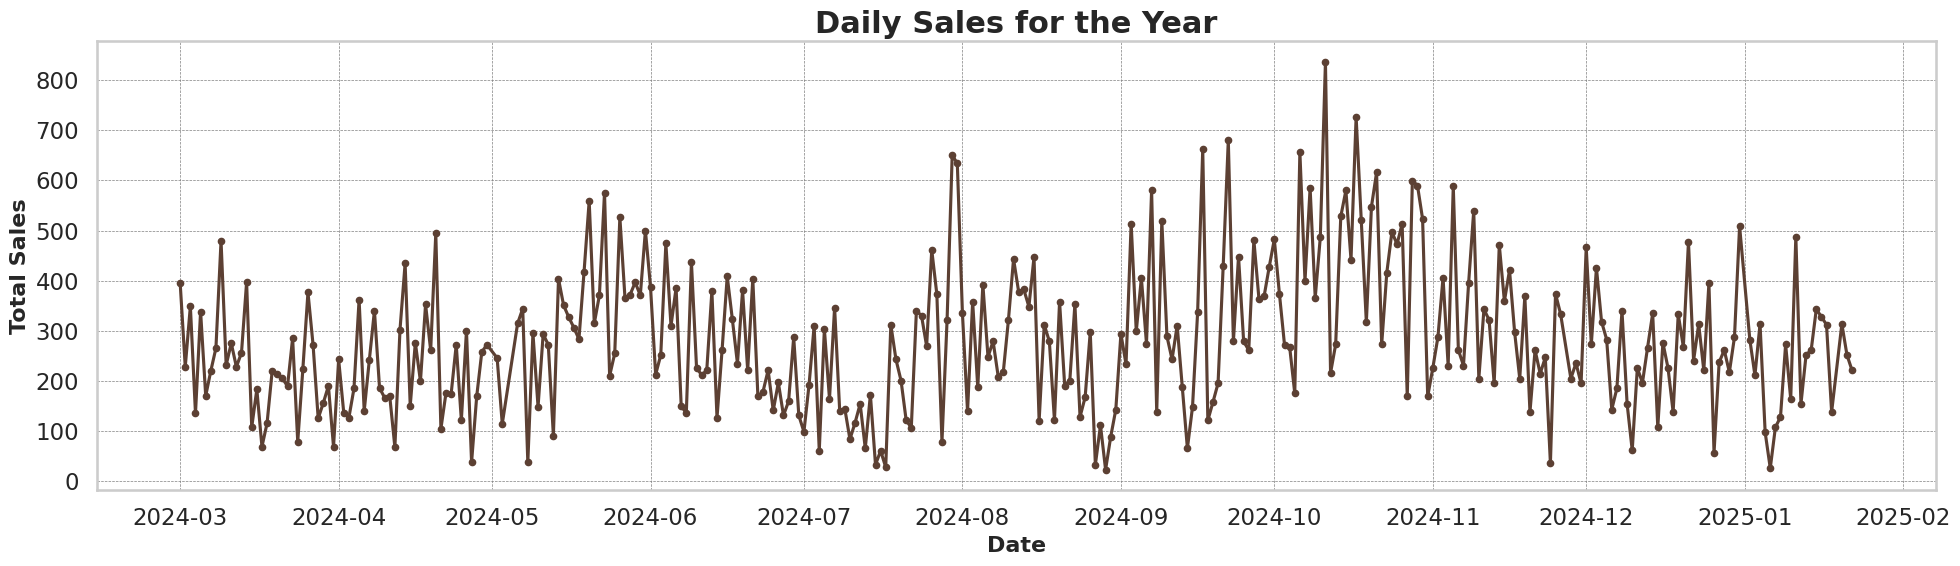

In [20]:
plt.figure(figsize=(20, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='.', linestyle='-', color = "#5C4033")
plt.title('Daily Sales for the Year', fontsize=22, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Total Sales', fontsize=16, fontweight='bold')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.tight_layout()
plt.show()

## **Coffee Sales Count by Hour of the Day and Day of the Week**

In [21]:
df['Day of Week'] = df['datetime'].dt.day_name()

daily_hourly_summary = df.groupby(['Day of Week', 'hour'])\
    .agg({'money': ['count', 'sum', 'mean']}).reset_index()
daily_hourly_summary.head()

Day of Week hour money                    
                   count      sum       mean
0      Friday    7    13   415.88  31.990769
1      Friday    8    37  1149.66  31.071892
2      Friday    9    39  1131.32  29.008205
3      Friday   10    37  1169.20  31.600000
4      Friday   11    24   714.18  29.757500

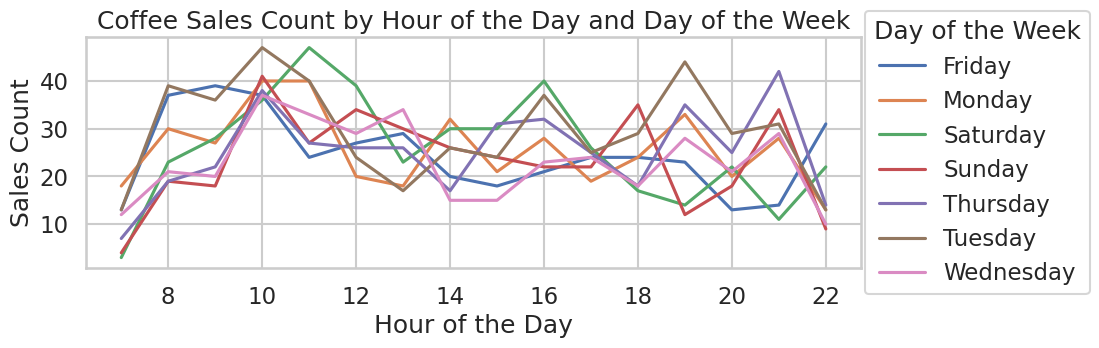

In [22]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=daily_hourly_summary, x='hour', y=('money', 'count'), hue='Day of Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales Count')
plt.title('Coffee Sales Count by Hour of the Day and Day of the Week')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.15, 0.5), loc='center');

## **Coffee Sales Sum by Hour of the Day and Day of the Week**

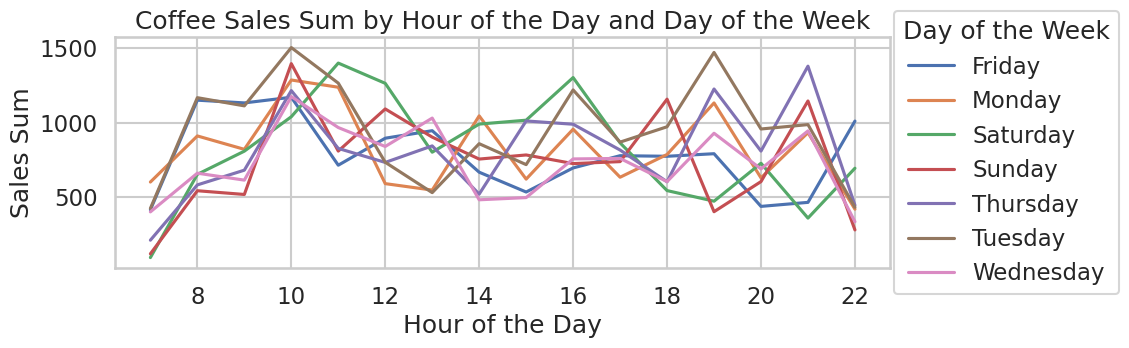

In [23]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=daily_hourly_summary, x='hour', y=('money', 'sum'), hue='Day of Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales Sum')
plt.title('Coffee Sales Sum by Hour of the Day and Day of the Week')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.15, 0.5), loc='center');

## **Coffee Sales Average by Hour of the Day and Day of the Week**

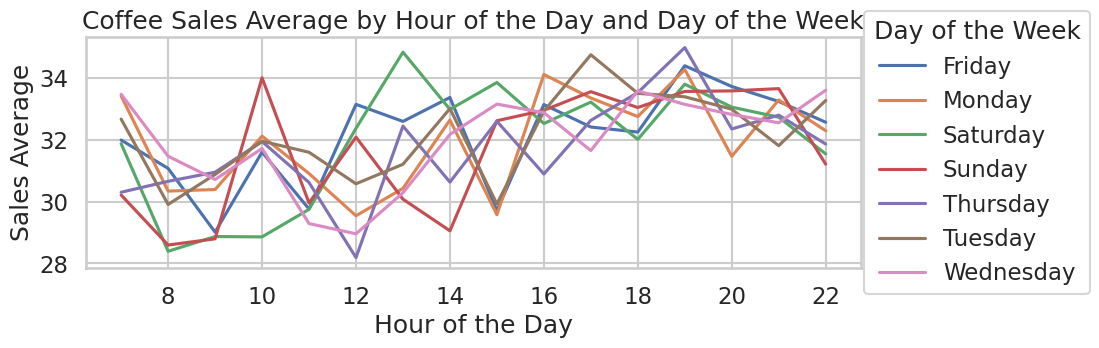

In [24]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=daily_hourly_summary, x='hour', y=('money', 'mean'), hue='Day of Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Sales Average')
plt.title('Coffee Sales Average by Hour of the Day and Day of the Week')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.15, 0.5), loc='center');

## **Average Coffee Sales per Month**

In [25]:
df['month'] = df['datetime'].dt.to_period('M')

In [26]:
df['month']

,month
0,2024-03
1,2024-03
2,2024-03
3,2024-03
4,2024-03
...,...
2833,2025-01
2834,2025-01
2835,2025-01
2836,2025-01


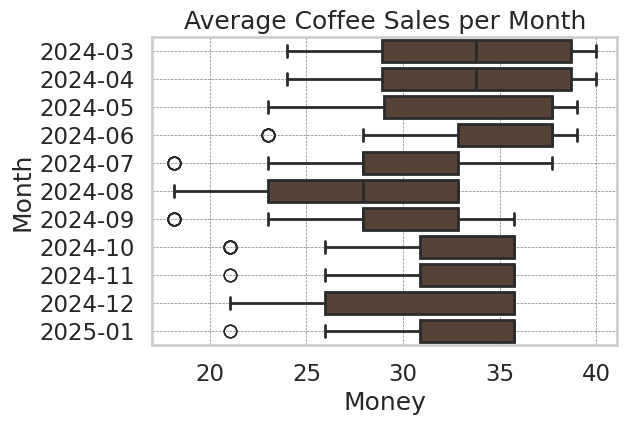

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x='money', y='month', data=df, color="#5C4033", linewidth=2)
plt.title('Average Coffee Sales per Month')
plt.xlabel('Money')
plt.ylabel('Month')
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")

plt.show()

## **Total Coffee Sales per Month**

In [28]:
monthly_coffee_sales = df.groupby('month')['money'].aggregate('sum')
monthly_coffee_sales = pd.DataFrame(monthly_coffee_sales).reset_index()

In [29]:
monthly_coffee_sales

,month,money
0,2024-03,7050.20
1,2024-04,6720.56
2,2024-05,9063.42
3,2024-06,7758.76
4,2024-07,6915.94
5,2024-08,7613.84
6,2024-09,9988.64
7,2024-10,13891.16
8,2024-11,8590.54
9,2024-12,8237.74


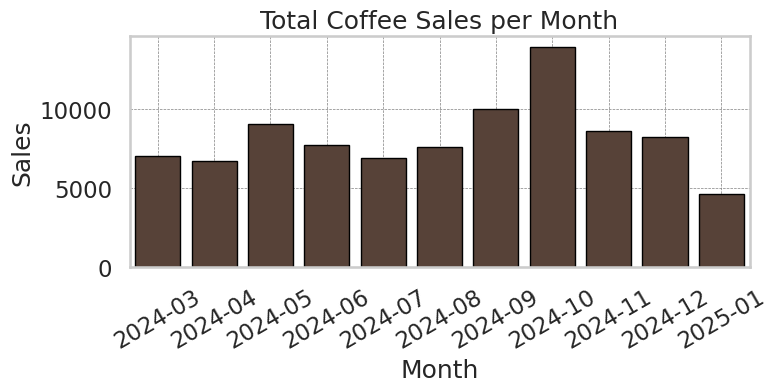

In [30]:
plt.figure(figsize=(8, 3))
sns.barplot(data=monthly_coffee_sales, x='month', y='money', color="#5C4033", edgecolor='black', linewidth=1);
plt.title('Total Coffee Sales per Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=30)
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.show()

## **Monthly Sales Revenue**

In [31]:
df["day"] = pd.to_datetime(df["date"]).dt.date
df["daily_sales"] = df.groupby(["day", "coffee_name"])["money"].transform("sum")

In [32]:
df["monthly_sales"] = df.groupby(["month", "coffee_name"])["money"].transform("sum")
df["month_str"] = df["month"].dt.strftime('%Y-%m')

In [33]:
df["monthly_sales"]

,monthly_sales
0,1874.50
1,854.00
2,854.00
3,1044.80
4,1874.50
...,...
2833,357.60
2834,1203.54
2835,679.44
2836,1180.08


In [34]:
df["month_str"]

,month_str
0,2024-03
1,2024-03
2,2024-03
3,2024-03
4,2024-03
...,...
2833,2025-01
2834,2025-01
2835,2025-01
2836,2025-01


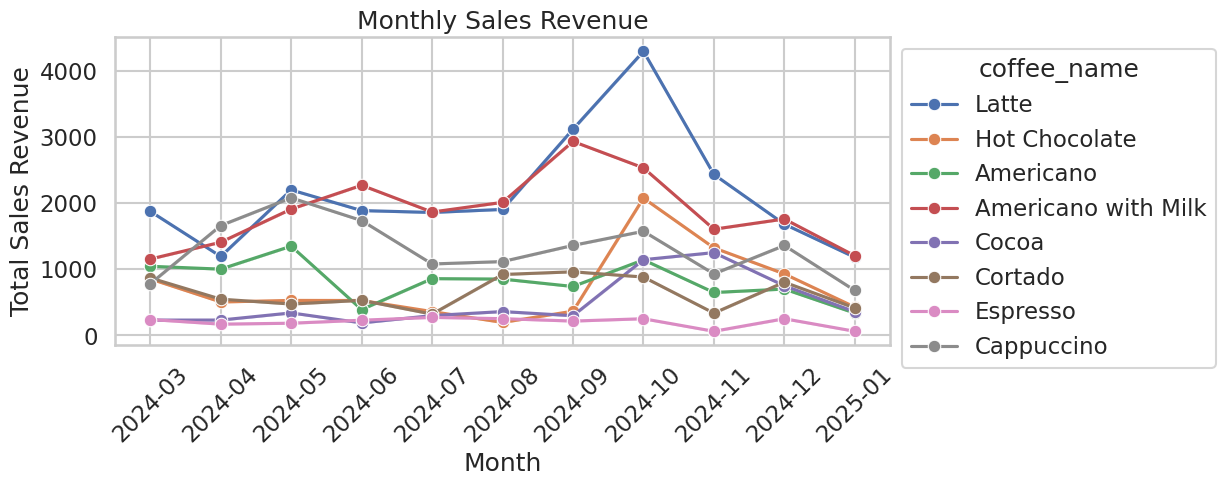

In [35]:
plt.figure(figsize=(10, 4))

sns.set(style="whitegrid")
sns.set_context("talk")

ax = sns.lineplot(data=df, x="month_str", y="monthly_sales", hue="coffee_name", marker="o")

# Grafik ayarları
plt.title("Monthly Sales Revenue")
plt.xlabel("Month")
plt.ylabel("Total Sales Revenue")
plt.xticks(rotation=45)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

## **Most Popular Coffee Types**

In [36]:
coffee_popularity = df['coffee_name'].value_counts()

In [37]:
coffee_popularity

,count
coffee_name,
Americano with Milk,674
Latte,663
Cappuccino,398
Americano,347
Cortado,274
Hot Chocolate,224
Cocoa,153
Espresso,105


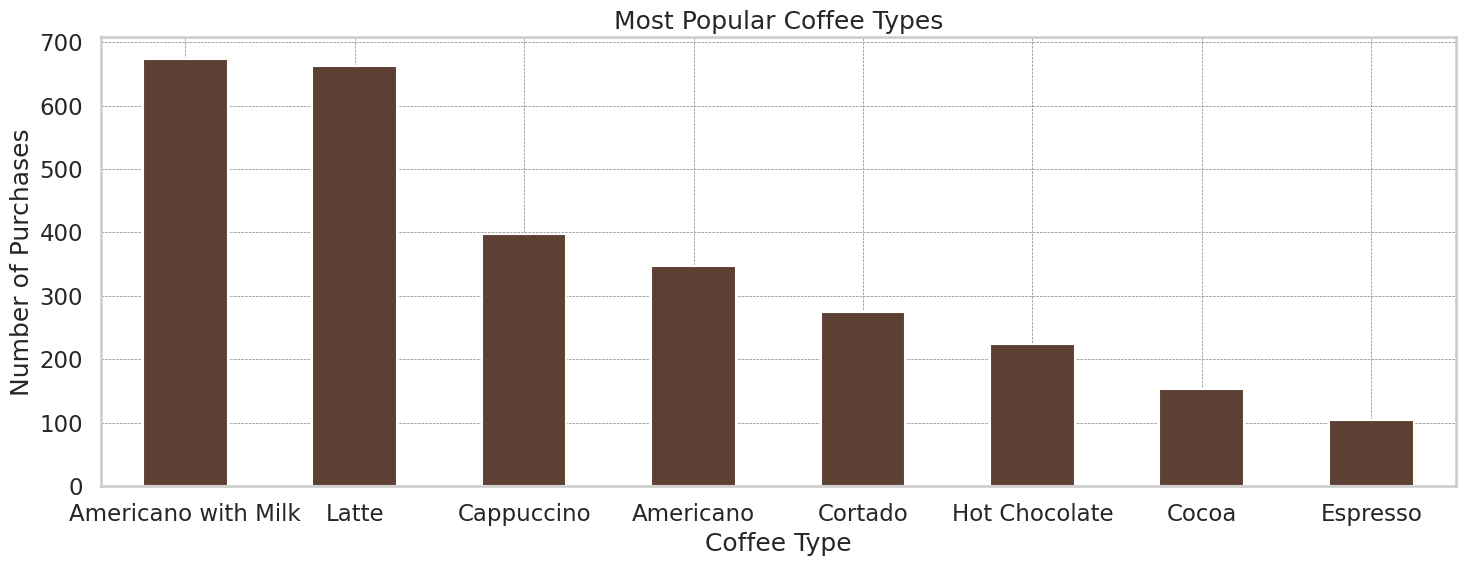

In [38]:
plt.figure(figsize=(15, 6))
coffee_popularity.plot(kind='bar', color="#5C4033")
plt.title('Most Popular Coffee Types')
plt.xlabel('Coffee Type')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.tight_layout()
plt.show()

## **Payment Method Distribution**

In [39]:
cash_or_card = df['cash_type'].value_counts()

In [40]:
cash_or_card

,count
cash_type,
card,2749
cash,89


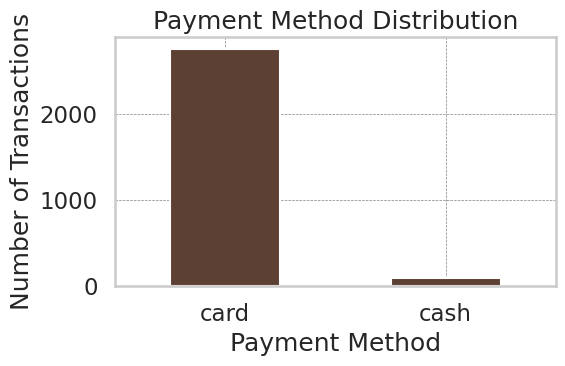

In [41]:
plt.figure(figsize=(6, 4))
cash_or_card.plot(kind='bar', color="#5C4033")
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.tight_layout()
plt.show()

## **Total Sales by Coffee Type**

In [42]:
sales_by_coffee_type = df.groupby('coffee_name')['money'].sum()

In [43]:
sales_by_coffee_type

,money
coffee_name,
Americano,9065.50
Americano with Milk,20640.12
Cappuccino,14350.86
Cocoa,5459.76
Cortado,7067.58
Espresso,2203.54
Hot Chocolate,8098.38
Latte,23610.86


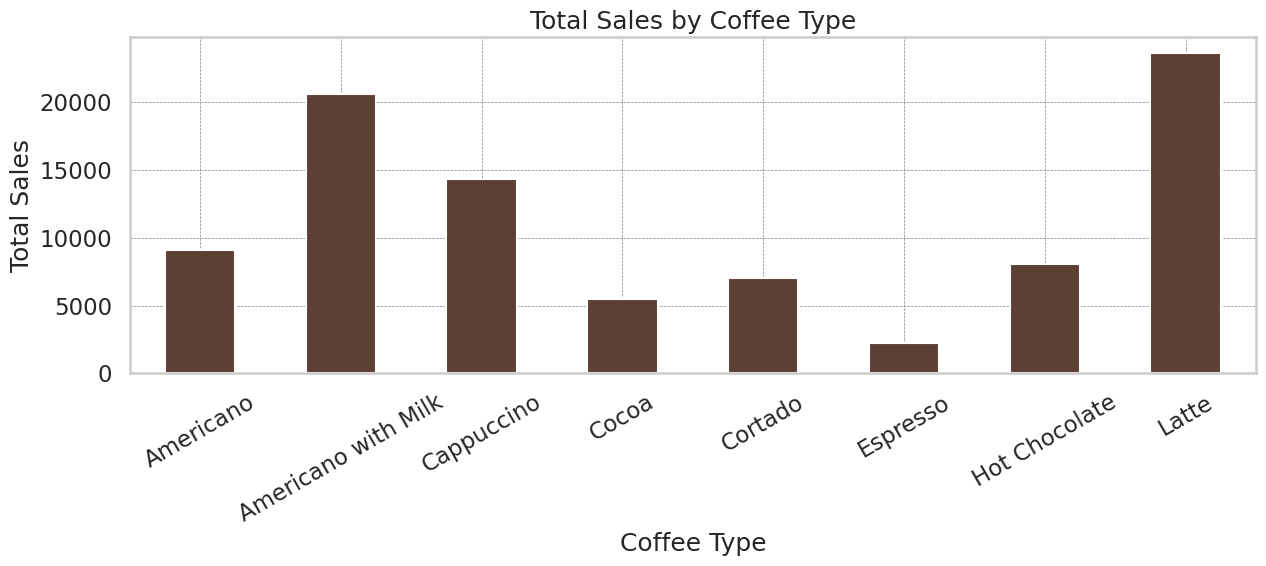

In [44]:
plt.figure(figsize=(13, 6))
sales_by_coffee_type.plot(kind='bar', color="#5C4033")
plt.title('Total Sales by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=30)
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.tight_layout()
plt.show()

# **Preprocessing**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2838 non-null   object        
 1   datetime            2838 non-null   datetime64[ns]
 2   cash_type           2838 non-null   object        
 3   card                2749 non-null   object        
 4   money               2838 non-null   float64       
 5   coffee_name         2838 non-null   object        
 6   hour                2838 non-null   int32         
 7   hourly_total_sales  2838 non-null   float64       
 8   Day of Week         2838 non-null   object        
 9   month               2838 non-null   period[M]     
 10  day                 2838 non-null   object        
 11  daily_sales         2838 non-null   float64       
 12  monthly_sales       2838 non-null   float64       
 13  month_str           2838 non-null   object      

In [46]:
df['Day_of_Week'] = df['datetime'].dt.day_of_week
df['Month'] = df['datetime'].dt.month
df['Day'] = df['datetime'].dt.day

In [47]:
df['minute'] = df['datetime'].dt.minute

In [48]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,hour,hourly_total_sales,Day of Week,month,day,daily_sales,monthly_sales,month_str,Day_of_Week,Month,Day,minute
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,2860.16,Friday,2024-03,2024-03-01,77.4,1874.5,2024-03,4,3,1,15
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,222.40,Friday,2024-03,2024-03-01,116.1,854.0,2024-03,4,3,1,19
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,222.40,Friday,2024-03,2024-03-01,116.1,854.0,2024-03,4,3,1,20
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,787.14,Friday,2024-03,2024-03-01,28.9,1044.8,2024-03,4,3,1,46
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,1271.68,Friday,2024-03,2024-03-01,77.4,1874.5,2024-03,4,3,1,48


***Label Encoding***

In [49]:
le = LabelEncoder()
df['coffee_name'] = le.fit_transform(df['coffee_name'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2838 non-null   object        
 1   datetime            2838 non-null   datetime64[ns]
 2   cash_type           2838 non-null   object        
 3   card                2749 non-null   object        
 4   money               2838 non-null   float64       
 5   coffee_name         2838 non-null   int64         
 6   hour                2838 non-null   int32         
 7   hourly_total_sales  2838 non-null   float64       
 8   Day of Week         2838 non-null   object        
 9   month               2838 non-null   period[M]     
 10  day                 2838 non-null   object        
 11  daily_sales         2838 non-null   float64       
 12  monthly_sales       2838 non-null   float64       
 13  month_str           2838 non-null   object      

# **Models Building**

## **LGBM Regressor Model**

In [51]:
x = df[["money", "hour", "hourly_total_sales", "monthly_sales", "minute", "Day_of_Week", "Month", "Day" , "coffee_name"]]
y = df["daily_sales"]

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [53]:
lgbm = LGBMRegressor(n_estimators=1000, random_state=42, learning_rate=0.05)
lgbm_model = lgbm.fit(x_train, y_train)
lgbm_model.score(x_test, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 364
[LightGBM] [Info] Number of data points in the train set: 2270, number of used features: 9
[LightGBM] [Info] Start training from score 94.066520


0.66587082982829

In [54]:
full_train = lgb.Dataset(x_train,y_train)
result_lgbm = pd.DataFrame()
result_lgbm['datetime'] = df['datetime'].values
result_lgbm['Predicted'] = np.concatenate([lgbm_model.predict(x_train),lgbm_model.predict(x_test)])
result_lgbm['Actual'] = np.concatenate([y_train, y_test])

In [55]:
result_lgbm

,datetime,Predicted,Actual
0,2024-03-01 10:15:50.520,69.665325,65.64
1,2024-03-01 12:19:22.539,112.244143,113.16
2,2024-03-01 12:20:18.089,55.724885,51.92
3,2024-03-01 13:46:33.006,67.078663,71.52
4,2024-03-01 13:48:14.626,43.433213,37.72
...,...,...,...
2833,2025-01-22 18:49:59.374,92.517224,28.90
2834,2025-01-22 19:10:26.039,112.350742,129.80
2835,2025-01-22 19:11:23.124,27.602690,25.00
2836,2025-01-22 19:29:15.703,30.686879,25.96


## **Random Forest Regressor Model**

In [56]:
rf = RandomForestRegressor(n_estimators=1000,random_state=42, n_jobs=-1)
rf_model = rf.fit(x_train, y_train)
rf_model.score(x_test, y_test)

0.6681797454856957

In [57]:
result_rf = pd.DataFrame()
result_rf['datetime'] = df['datetime'].values
result_rf['Predicted'] = np.concatenate([rf_model.predict(x_train), rf_model.predict(x_test)])
result_rf['Actual'] = np.concatenate([y_train, y_test])

In [58]:
result_rf

,datetime,Predicted,Actual
0,2024-03-01 10:15:50.520,75.01578,65.64
1,2024-03-01 12:19:22.539,109.89028,113.16
2,2024-03-01 12:20:18.089,52.91640,51.92
3,2024-03-01 13:46:33.006,68.76400,71.52
4,2024-03-01 13:48:14.626,41.56964,37.72
...,...,...,...
2833,2025-01-22 18:49:59.374,78.05940,28.90
2834,2025-01-22 19:10:26.039,112.43646,129.80
2835,2025-01-22 19:11:23.124,45.66268,25.00
2836,2025-01-22 19:29:15.703,50.83960,25.96


## **XGB Regressor Model**

In [59]:
boost = xgb.XGBRegressor()
xgb_model = boost.fit(x_train, y_train)
xgb_model.score(x_test, y_test)

0.6679965375644049

In [60]:
result_xgb = pd.DataFrame()
result_xgb['datetime'] = df['datetime'].values
result_xgb['Predicted'] = np.concatenate([xgb_model.predict(x_train), xgb_model.predict(x_test)])
result_xgb['Actual'] = np.concatenate([y_train, y_test])

In [61]:
result_xgb

,datetime,Predicted,Actual
0,2024-03-01 10:15:50.520,69.190315,65.64
1,2024-03-01 12:19:22.539,111.262459,113.16
2,2024-03-01 12:20:18.089,55.718624,51.92
3,2024-03-01 13:46:33.006,66.967072,71.52
4,2024-03-01 13:48:14.626,40.600006,37.72
...,...,...,...
2833,2025-01-22 18:49:59.374,79.968201,28.90
2834,2025-01-22 19:10:26.039,112.353516,129.80
2835,2025-01-22 19:11:23.124,42.642128,25.00
2836,2025-01-22 19:29:15.703,22.807762,25.96


## **Visualization of Actual and Predicted Values**

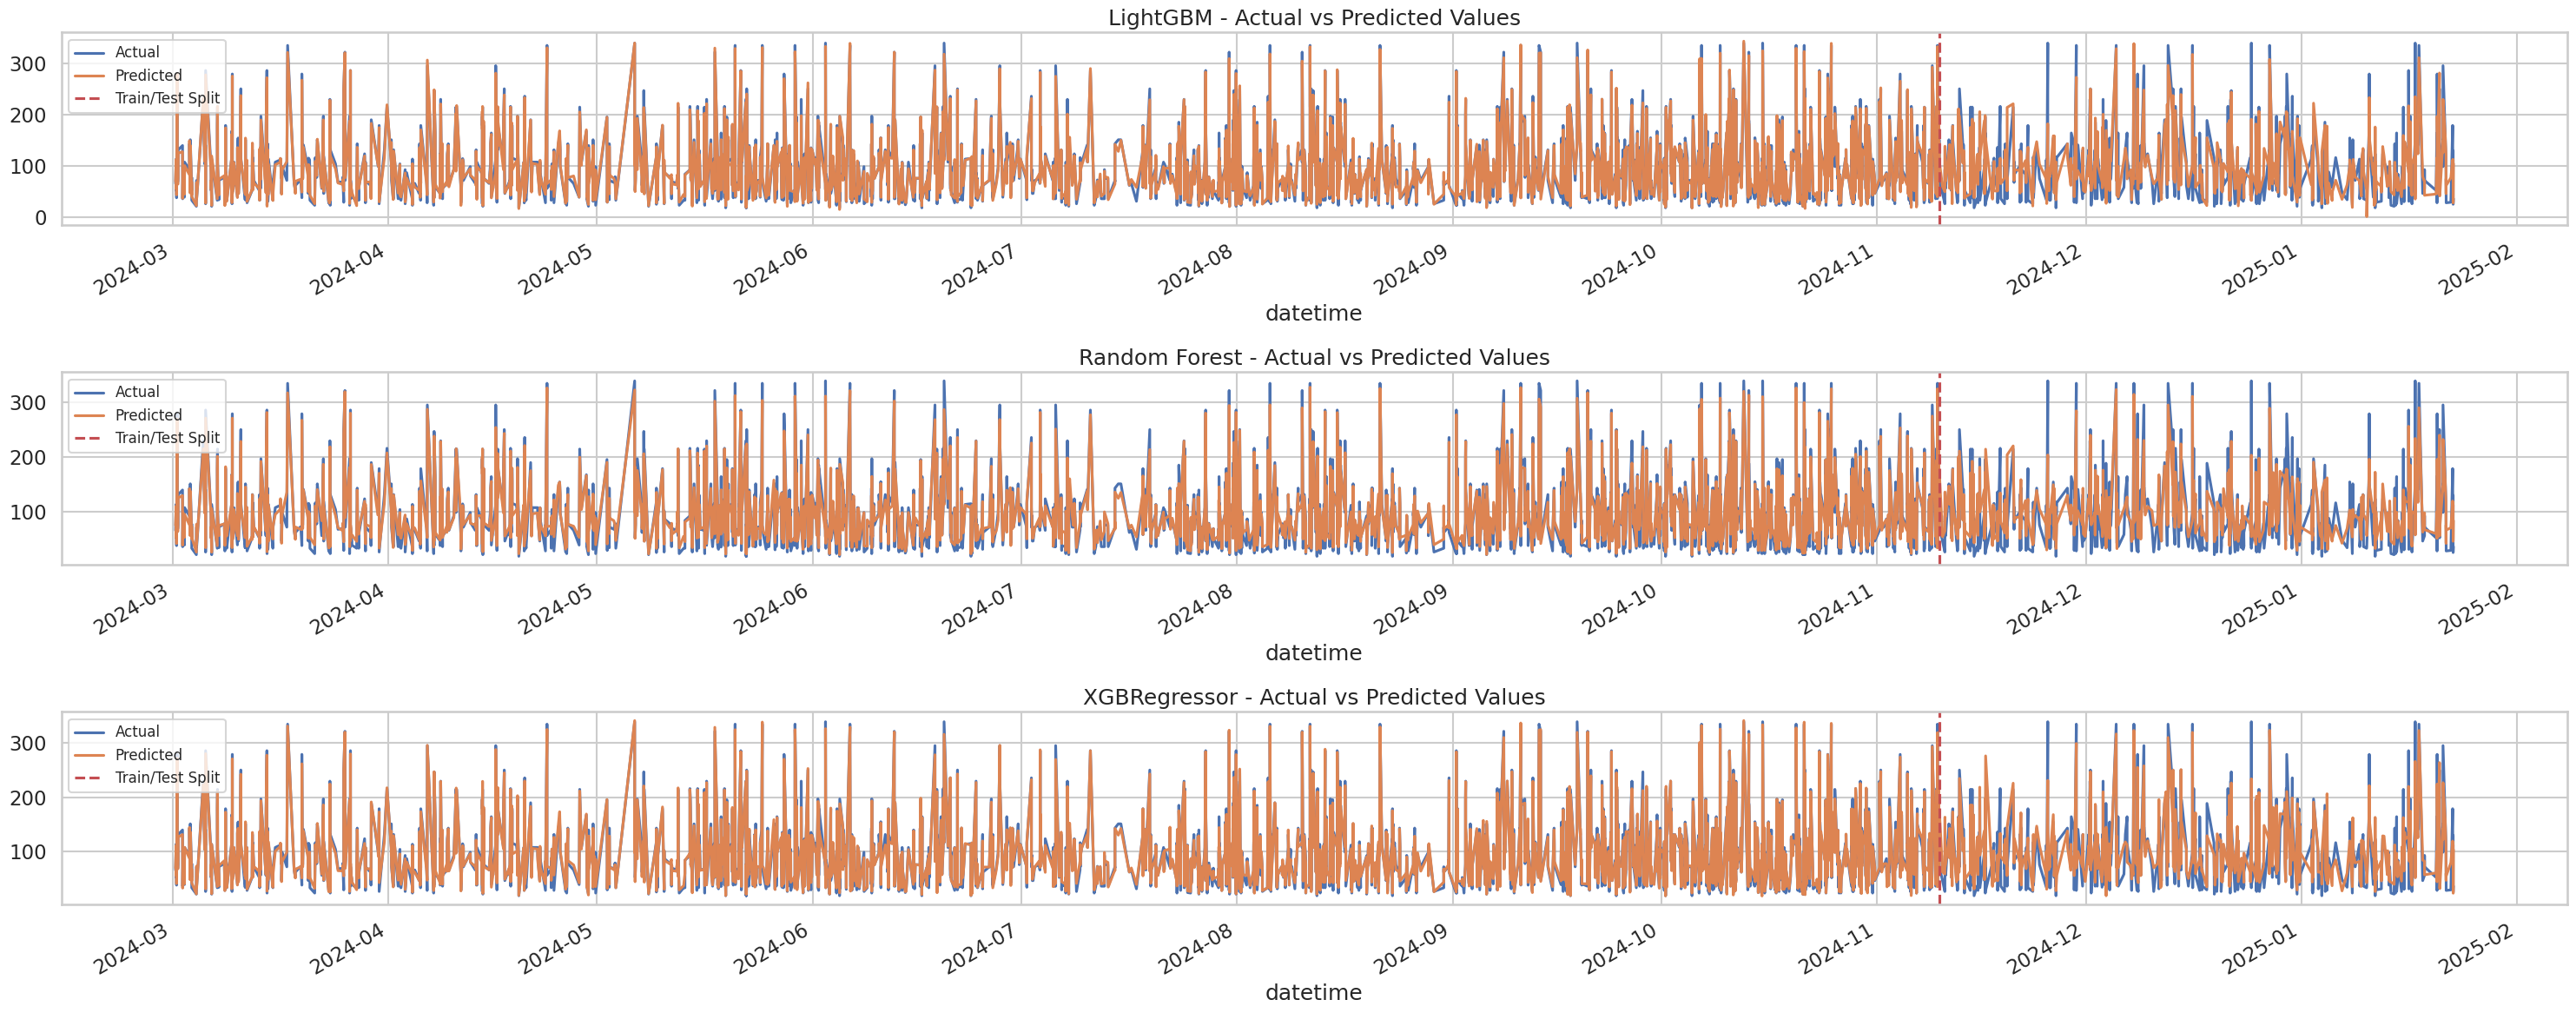


Performance Metrics of All Models:
        Model Dataset  R2 Score      RMSE       MAE     MAPE
     LightGBM   Train  0.983530  8.068513  5.951899 0.096910
Random Forest   Train  0.960112 12.556630  9.365904 0.163064
      XGBoost   Train  0.985025  7.693767  5.360090 0.089050
     LightGBM    Test  0.665871 37.601782 27.362469 0.461616
Random Forest    Test  0.668180 37.471638 27.907525 0.487448
      XGBoost    Test  0.667997 37.481982 27.172032 0.475843


In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30, 12))

result_lgbm.plot.line(x='datetime', y=['Actual', 'Predicted'], ax=ax1)
ax1.axvline(x=df.iloc[len(x_train)].datetime, color='r', linestyle='--', label='Train/Test Split')
ax1.legend(prop=dict(size=12))
ax1.set_title('LightGBM - Actual vs Predicted Values')

result_rf.plot.line(x='datetime', y=['Actual', 'Predicted'], ax=ax2)
ax2.axvline(x=df.iloc[len(x_train)].datetime, color='r', linestyle='--', label='Train/Test Split')
ax2.legend(prop=dict(size=12))
ax2.set_title('Random Forest - Actual vs Predicted Values')

result_xgb.plot.line(x='datetime', y=['Actual', 'Predicted'], ax=ax3)
ax3.axvline(x=df.iloc[len(x_train)].datetime, color='r', linestyle='--', label='Train/Test Split')
ax3.legend(prop=dict(size=12))
ax3.set_title('XGBRegressor - Actual vs Predicted Values')

plt.tight_layout()
plt.show()

def calculate_metrics(y_true, y_pred, model_name, dataset_type):
    metrics = {
        'Model': model_name,
        'Dataset': dataset_type,
        'R2 Score': r2_score(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred)
    }
    return metrics

models = {
    'LightGBM': lgbm_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

all_metrics = []

for name, model in models.items():
    metrics = calculate_metrics(y_train, model.predict(x_train), name, 'Train')
    all_metrics.append(metrics)

for name, model in models.items():
    metrics = calculate_metrics(y_test, model.predict(x_test), name, 'Test')
    all_metrics.append(metrics)

metrics_df = pd.DataFrame(all_metrics)
print("\nPerformance Metrics of All Models:")
print(metrics_df.to_string(index=False))

# **Daily Sales Forecast for Next 14 Days Using FBProphet**

In [63]:
df_prophet = df[['datetime', 'daily_sales']].rename(columns={'datetime':'ds', 'daily_sales':'y'})
df_prophet

,ds,y
0,2024-03-01 10:15:50.520,77.40
1,2024-03-01 12:19:22.539,116.10
2,2024-03-01 12:20:18.089,116.10
3,2024-03-01 13:46:33.006,28.90
4,2024-03-01 13:48:14.626,77.40
...,...,...
2833,2025-01-22 18:49:59.374,35.76
2834,2025-01-22 19:10:26.039,92.58
2835,2025-01-22 19:11:23.124,35.76
2836,2025-01-22 19:29:15.703,35.76


In [64]:
prophet_df = pd.DataFrame()
prophet_df['ds'] = df['datetime']
prophet_df['y'] = df['daily_sales']

prophet_df = prophet_df.sort_values('ds').reset_index(drop=True)

In [65]:
prophet_df

,ds,y
0,2024-03-01 10:15:50.520,77.40
1,2024-03-01 12:19:22.539,116.10
2,2024-03-01 12:20:18.089,116.10
3,2024-03-01 13:46:33.006,28.90
4,2024-03-01 13:48:14.626,77.40
...,...,...
2833,2025-01-22 18:49:59.374,35.76
2834,2025-01-22 19:10:26.039,92.58
2835,2025-01-22 19:11:23.124,35.76
2836,2025-01-22 19:29:15.703,35.76


DEBUG:cmdstanpy:input tempfile: /tmp/tmpc8sq9rlm/tyr62rdj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc8sq9rlm/phsob7hp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99270', 'data', 'file=/tmp/tmpc8sq9rlm/tyr62rdj.json', 'init=/tmp/tmpc8sq9rlm/phsob7hp.json', 'output', 'file=/tmp/tmpc8sq9rlm/prophet_modeluab135u4/prophet_model-20250220171738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:17:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:17:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


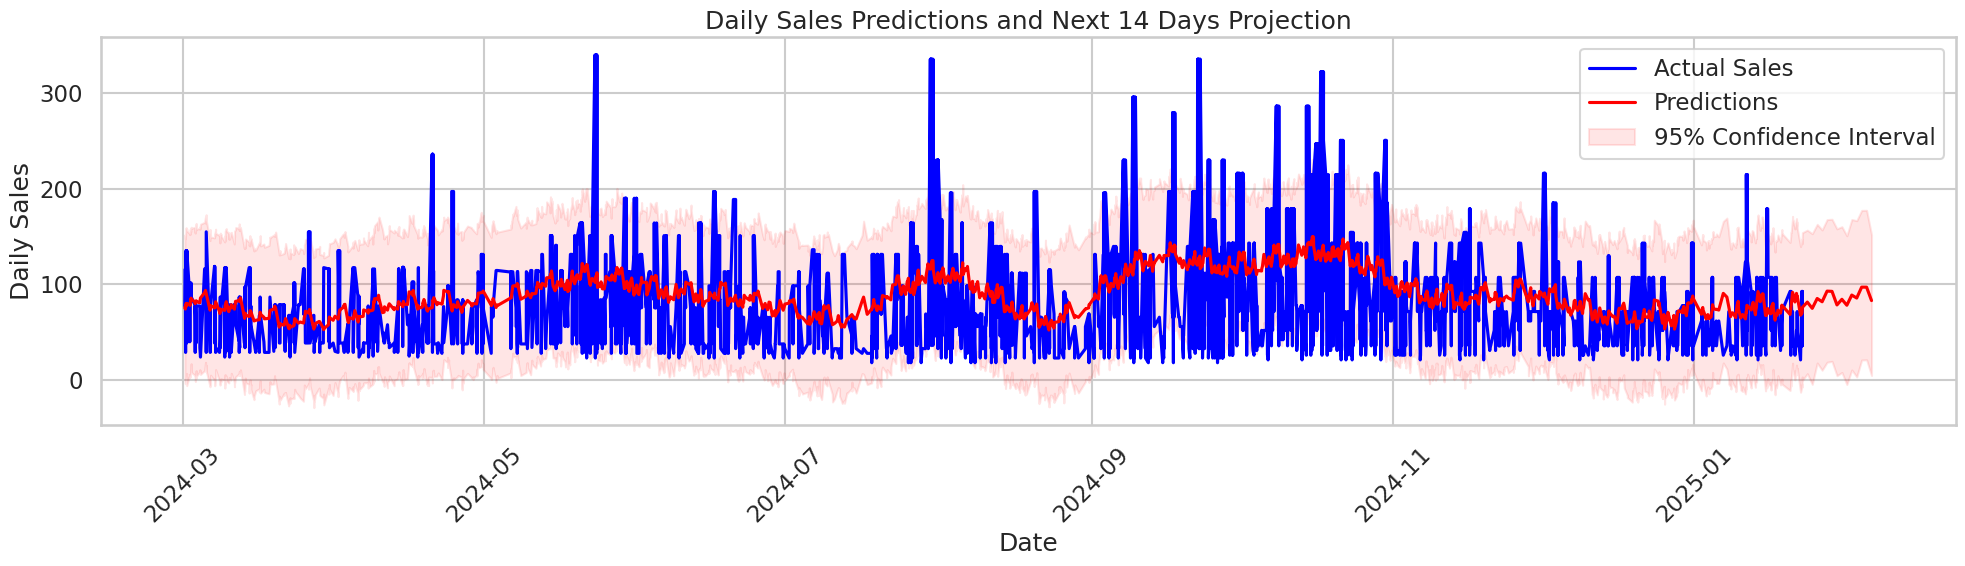

In [66]:
prophet_model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode='multiplicative'
)

prophet_model.fit(prophet_df)

future_dates = prophet_model.make_future_dataframe(periods=14, freq='D')
forecast = prophet_model.predict(future_dates)

fig, ax = plt.subplots(figsize=(20, 6))

plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual Sales', color='blue')

plt.plot(forecast['ds'], forecast['yhat'], label='Predictions', color='red', linestyle='-')

plt.fill_between(forecast['ds'],
                forecast['yhat_lower'],
                forecast['yhat_upper'],
                color='red',
                alpha=0.1,
                label='95% Confidence Interval')

plt.title('Daily Sales Predictions and Next 14 Days Projection')
plt.xlabel('Date')
plt.ylabel('Daily Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
print("\nNext 14 Days Sales Predictions:")
future_predictions = forecast.tail(14)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
future_predictions.columns = ['Date', 'Predicted Sales', 'Lower Bound', 'Upper Bound']
print(future_predictions.round(2).to_string(index=False))


Next 14 Days Sales Predictions:
                   Date  Predicted Sales  Lower Bound  Upper Bound
2025-01-23 20:14:30.728            81.43         6.68       156.58
2025-01-24 20:14:30.728            74.90        -4.46       152.83
2025-01-25 20:14:30.728            85.19        17.84       162.63
2025-01-26 20:14:30.728            81.78        10.28       156.79
2025-01-27 20:14:30.728            92.90        18.66       167.62
2025-01-28 20:14:30.728            92.63        19.52       167.95
2025-01-29 20:14:30.728            78.46         4.57       157.96
2025-01-30 20:14:30.728            84.35         7.94       160.16
2025-01-31 20:14:30.728            78.14        -4.61       150.71
2025-02-01 20:14:30.728            88.77        10.56       167.70
2025-02-02 20:14:30.728            85.65         3.30       166.44
2025-02-03 20:14:30.728            97.05        20.93       177.21
2025-02-04 20:14:30.728            97.01        21.16       177.30
2025-02-05 20:14:30.728      


Component Analysis:


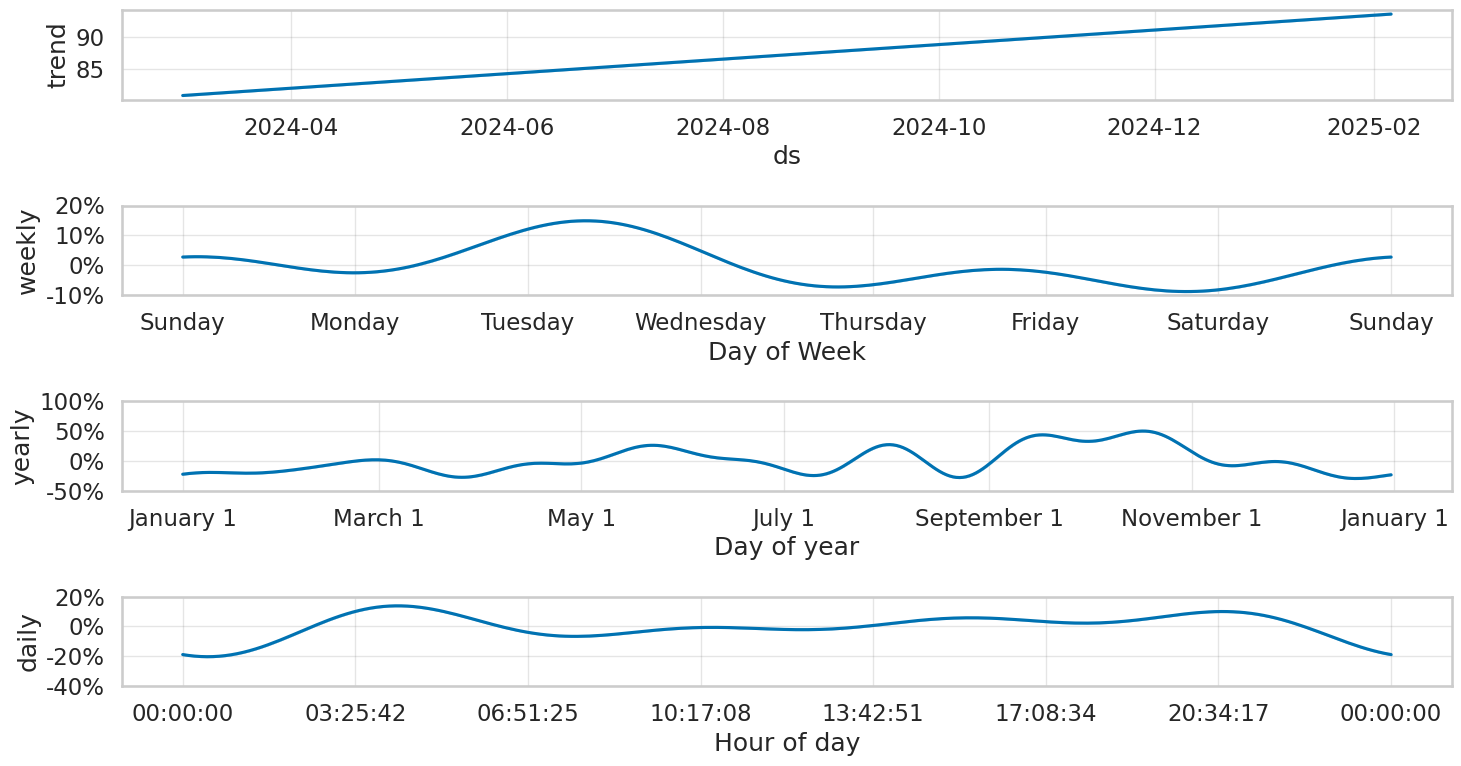

In [68]:
print("\nComponent Analysis:")
fig2 = prophet_model.plot_components(forecast, figsize=(15,8));
plt.show()

# **Correlation Heatmap**

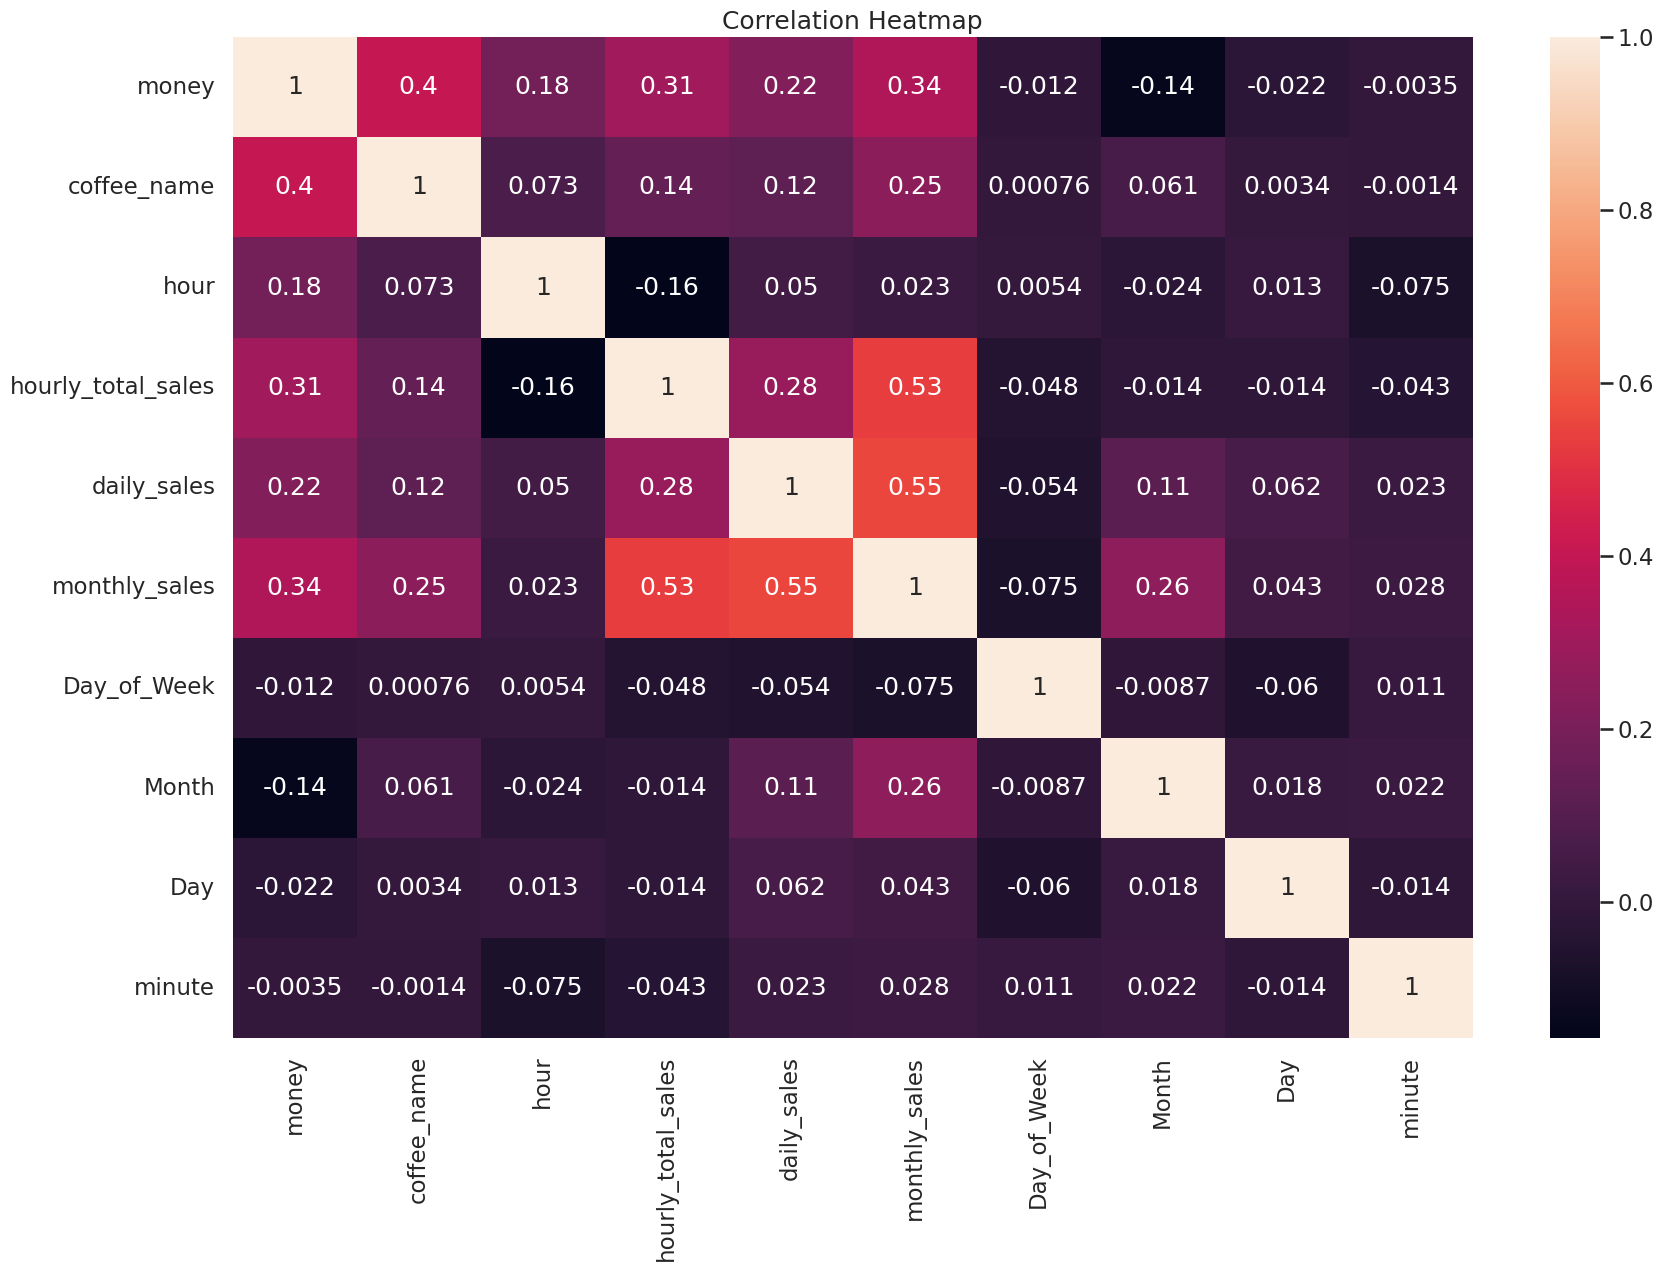

In [69]:
numerical_features = df.select_dtypes(include=['number', 'bool']).columns
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(20, 13))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()